In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust
import seaborn as sns
import wquantiles

## Descriptive Statistics

### Measure of Central Tendency

In [2]:
state = pd.read_csv('.//Practical Statistics Code//data//state.csv')
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [3]:
state['Population'].mean()

6162876.3

In [4]:
scipy.stats.trim_mean(state['Population'],0.1,axis = 0) #proportiontocut = 0.1 will slice 10% of the rightmost and leftmost data

4783697.125

In [5]:
state['Population'].median()

4436369.5

In [6]:
#weighted mean is available in numpy
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

In [7]:
#weighted median
wquantiles.median(state['Murder.Rate'],weights=state['Population'])

4.4

### Estimate of Variability

In [8]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [9]:
#standard deviation
state['Population'].std()

6848235.347401142

In [11]:
#variance
state['Population'].var()

46898327373394.445

In [13]:
# percentiles
print(state['Population'].quantile(0.75)) #75th percentile
print(state['Population'].quantile(0.25)) #25th percentile

6680312.25
1833004.25


In [19]:
state['Population'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64

In [20]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [21]:
percentages = [0.05,0.25,0.5,0.75,0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index  = [f'{p*100}%' for p in percentages]
df

,Murder.Rate
5.0%,1.600
25.0%,2.425
50.0%,4.000
75.0%,5.550
95.0%,6.510


In [15]:
# Interquartile range
# IQR = 75th Percentile - 25th Percentile
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [17]:
#neither the variance, nor the standard deviation is robust to outliers and extreme values.
#median absolute deviation is robust to outliers. MAD = Median(|x1-m|,|x2-m|,....|xn-m|)

MAD = robust.scale.mad(state['Population'])
MAD

3849876.1459979336

### Data Distribution

<AxesSubplot:ylabel='Population'>

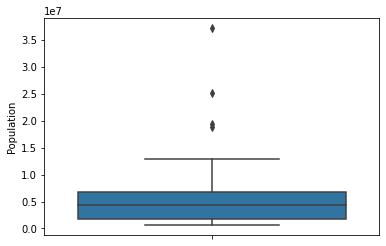

In [28]:
#boxplot
sns.boxplot(y = state['Population'])

In [44]:
#frequency table
ser,bins = pd.cut(state['Population'],bins = 10,retbins = True)
print(ser)
print(bins)

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [45]:
ser.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [46]:
new_df = pd.concat([state,ser],axis = 1)
new_df

,State,Population,Murder.Rate,Abbreviation,Population
0,Alabama,4779736,5.7,AL,"(4232659.0, 7901692.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
2,Arizona,6392017,4.7,AZ,"(4232659.0, 7901692.0]"
3,Arkansas,2915918,5.6,AR,"(526935.67, 4232659.0]"
4,California,37253956,4.4,CA,"(33584923.0, 37253956.0]"
5,Colorado,5029196,2.8,CO,"(4232659.0, 7901692.0]"
6,Connecticut,3574097,2.4,CT,"(526935.67, 4232659.0]"
7,Delaware,897934,5.8,DE,"(526935.67, 4232659.0]"
8,Florida,18801310,5.8,FL,"(15239758.0, 18908791.0]"
9,Georgia,9687653,5.7,GA,"(7901692.0, 11570725.0]"


Text(0.5, 0, 'Population (in millions)')

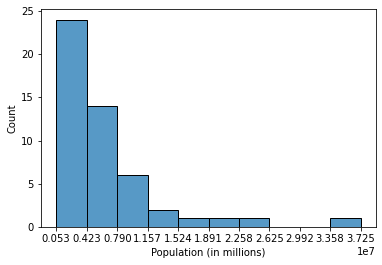

In [51]:
g = sns.histplot(data = state,x = 'Population',bins = bins)
g.set_xticks(bins)
g.set_xlabel("Population (in millions)")

### Density plot

shows the distribution of data values as a continuous line.

Text(0.5, 0, 'Population (in millions)')

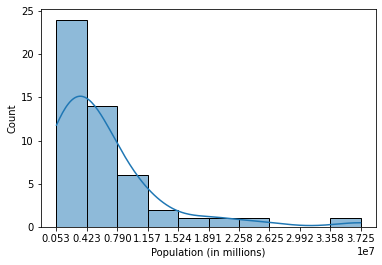

In [53]:
g = sns.histplot(data = state,x = 'Population',bins = bins,kde=True)
g.set_xticks(bins)
g.set_xlabel("Population (in millions)")

<AxesSubplot:xlabel='Population', ylabel='Density'>

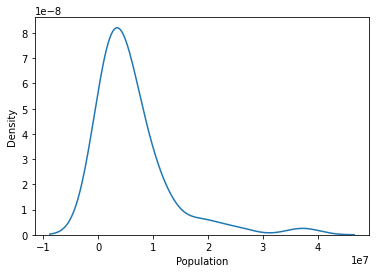

In [55]:
sns.kdeplot(state['Population'])

Density estimation is the process of estimating the PDF of population from the sample.

non parametric estimation - no assumption on population's distribution.

Kernel density estimation - KDE is a non-parametric method to estimate pdf of data generating distribution. KDE allocates high density to certain x if sample data has many datapoints around it. A datapoint’s contribution to certain x depends on its distance to x and bandwidth. As the sample size increases, KDE approximation under certain conditions approaches true pdf.Kernel function should always produce a value greater than or equal to zero and it should integrate to 1 over the sample space. Some popular kernels are uniform, gaussian, biweight, etc.

https://www.kdnuggets.com/2019/10/overview-density-estimation.html

<AxesSubplot:xlabel='Murder.Rate', ylabel='Density'>

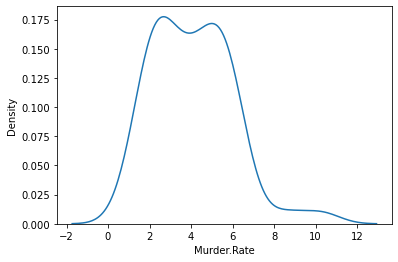

In [56]:
sns.kdeplot(state['Murder.Rate'])

<AxesSubplot:xlabel='Murder.Rate', ylabel='Density'>

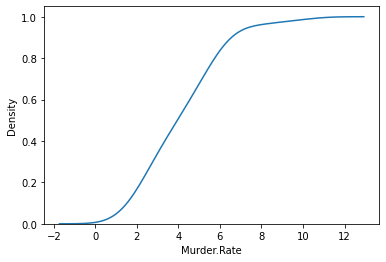

In [57]:
sns.kdeplot(state['Murder.Rate'],cumulative = True)

### Categorical Data

In [58]:
airport = pd.read_csv('.//Practical Statistics Code//data//dfw_airline.csv')
airport

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0.5, 0, 'Cause of Delay')

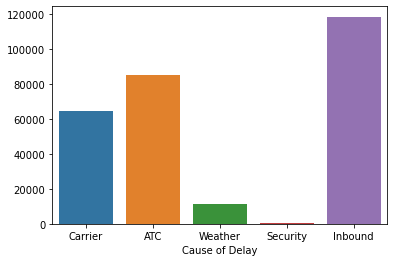

In [60]:
ax = sns.barplot(data = airport)
ax.set_xlabel('Cause of Delay')

In [6]:
airline_delay = pd.read_csv('.//Practical Statistics Code//data//airline_stats.csv')
airline_delay.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


Text(0, 0.5, 'Daily % of the delayed flights')

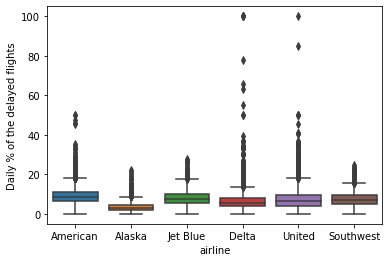

In [12]:
ax = sns.boxplot(x ='airline', y = 'pct_carrier_delay',data=airline_delay)
ax.set_ylabel('Daily % of the delayed flights')

violin plot shows density estimates with density on the y axis.

<AxesSubplot:xlabel='airline', ylabel='pct_carrier_delay'>

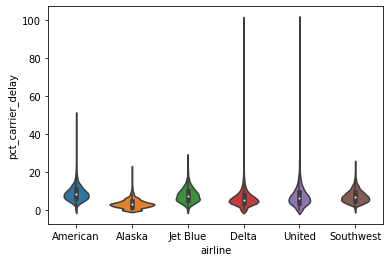

In [13]:
sns.violinplot(x ='airline', y = 'pct_carrier_delay',data=airline_delay)

### Correlation

In [64]:
sp500_sectors = pd.read_csv('.//Practical Statistics Code//data//sp500_sectors.csv')
sp500_data = pd.read_csv('.//Practical Statistics Code//data//sp500_data.csv',index_col=0)

In [65]:
print("sp500 sectors")
print(sp500_sectors.head())
print(" ")
print("sp500 data")
print(sp500_data.head())

sp500 sectors
                   sector sector_label                             sub_sector  \
0  information_technology   Technology  data_processing_&_outsourced_services   
1  information_technology   Technology                       systems_software   
2  information_technology   Technology                       systems_software   
3  information_technology   Technology                       systems_software   
4  information_technology   Technology               it_consulting_&_services   

  symbol  
0    ADS  
1     CA  
2   MSFT  
3    RHT  
4   CTSH  
 
sp500 data
            ADS        CA      MSFT  RHT  CTSH       CSC       EMC       IBM  \
1993-01-29  0.0  0.060124 -0.022100  0.0   0.0  0.018897  0.007368  0.092165   
1993-02-01  0.0 -0.180389  0.027621  0.0   0.0  0.018889  0.018425  0.115207   
1993-02-02  0.0 -0.120257  0.035900  0.0   0.0 -0.075573  0.029482 -0.023041   
1993-02-03  0.0  0.060124 -0.024857  0.0   0.0 -0.151128  0.003689 -0.253454   
1993-02-04  0.0 -0.3

In [68]:
telecom_symbols = sp500_sectors[sp500_sectors['sector'] == 'telecommunications_services']['symbol']
telecom_symbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [70]:
telecom_data = sp500_data.loc[sp500_data.index > '2012-07-01',telecom_symbols]
telecom_data  #it shows daily returns for these telecom stocks

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


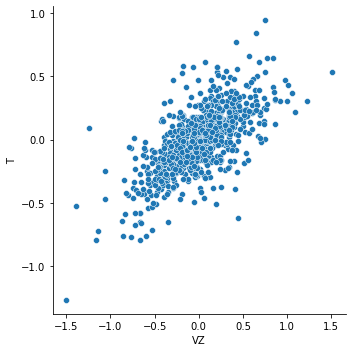

In [96]:
sns.relplot(x='VZ',y='T',data = telecom_data)

In [71]:
telecom_data.cov()  #calculates covariance and returns a covariance matrix

,T,CTL,FTR,VZ,LVLT
T,0.065749,0.046853,0.006930,0.065870,0.039867
CTL,0.046853,0.148176,0.013323,0.060796,0.061576
FTR,0.006930,0.013323,0.006799,0.008984,0.011966
VZ,0.065870,0.060796,0.008984,0.143722,0.051237
LVLT,0.039867,0.061576,0.011966,0.051237,0.311384


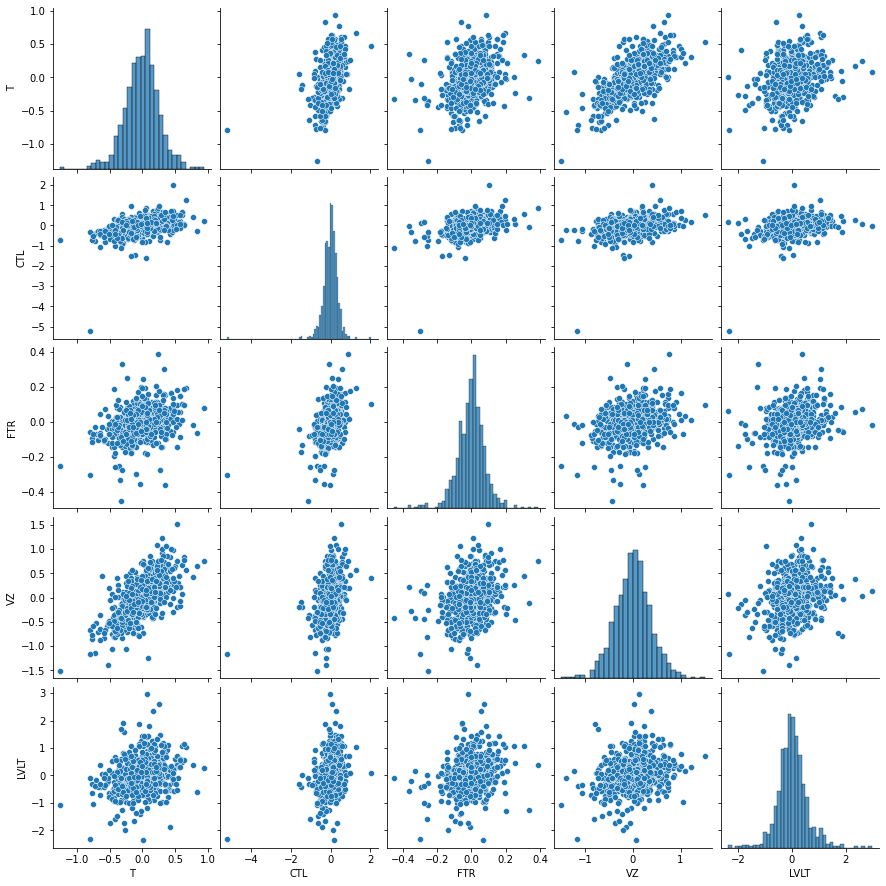

In [72]:
sns.pairplot(telecom_data)

In [73]:
#correlation
# above scatter plots shows linear relationship. Hence we can use pearson correlation
telecom_data.corr(method = 'pearson')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [74]:
telecom_data.corr(method='spearman')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.495345,0.324027,0.664985,0.289232
CTL,0.495345,1.000000,0.371543,0.423900,0.251322
FTR,0.324027,0.371543,1.000000,0.269324,0.267911
VZ,0.664985,0.423900,0.269324,1.000000,0.245456
LVLT,0.289232,0.251322,0.267911,0.245456,1.000000


In [82]:
ITstock_symbols = sp500_sectors[(sp500_sectors['sector'] == 'information_technology') & (sp500_sectors['sub_sector']=='internet_software_&_services')]['symbol']
ITstock_symbols

42     AKAM
43      ADP
44     CTXS
45     EBAY
46     EQIX
47       FB
48      FIS
49     FISV
50    GOOGL
51     GOOG
52     INTU
53       MA
54     NTAP
55     NFLX
56     PAYX
57      CRM
58      TSS
59     VRSN
60        V
61       WU
62     YHOO
Name: symbol, dtype: object

In [84]:
IT_stocks = sp500_data.loc[sp500_data.index>'2012-07-01',ITstock_symbols]
IT_stocks  #daily returns of IT companies working in internet_software_&_services subsector.

,AKAM,ADP,CTXS,EBAY,EQIX,FB,FIS,FISV,GOOGL,GOOG,...,MA,NTAP,NFLX,PAYX,CRM,TSS,VRSN,V,WU,YHOO
2012-07-02,-0.320000,0.301330,-0.090004,-0.416666,0.474656,-0.480000,0.330744,0.099998,-0.675659,0.000000,...,0.475258,-0.740850,-0.131429,0.170734,0.540001,0.450811,0.090000,0.576645,0.027423,0.040000
2012-07-03,0.619999,0.065157,1.530007,-0.037880,0.806922,0.290001,0.349645,0.205002,3.913910,0.000000,...,0.218437,0.096215,0.507143,-0.107833,0.622501,0.067141,0.850002,-0.036652,0.201107,0.150000
2012-07-05,0.080002,0.659677,-1.599998,-0.151516,0.664516,0.149999,-0.122846,0.154999,3.583588,0.000000,...,0.355454,0.105837,1.055715,0.251611,0.367500,-0.057549,0.770001,0.310314,-0.018283,-0.050000
2012-07-06,-0.719999,-0.447931,-3.560005,-0.155724,-0.816409,0.289999,0.103950,-0.149998,-3.238220,0.000000,...,0.059076,-0.856310,-0.264286,-0.431332,-0.965000,-0.047958,-0.849999,-0.195473,-0.018283,-0.020000
2012-07-09,-1.360000,0.008146,-1.090004,0.075758,-4.566193,0.070000,0.141746,-0.040001,0.530549,0.000000,...,-0.301299,-0.558045,0.001429,0.269585,-1.134998,-0.201425,-0.390000,0.122170,0.073130,-0.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.030007,-0.360001,-0.209999,-0.033670,0.690002,-1.279999,-0.379997,-0.260002,-2.349976,-3.640015,...,-1.407617,-0.546866,-0.590004,0.040001,-0.709999,0.090000,-0.229999,-0.759994,-0.240000,-0.029998
2015-06-26,-0.170006,-0.470001,-0.720001,-0.235691,2.339996,-0.110001,0.119999,0.240005,-6.650024,-5.570008,...,-0.289510,-0.258517,-2.211433,-0.349998,-1.410004,0.180000,-0.439998,0.050003,-0.359998,-0.770001
2015-06-29,-1.110001,-1.889999,-0.470001,-0.542931,-6.330002,-0.809998,-0.580002,-1.650001,-5.500000,-3.489990,...,-1.158039,-0.357950,0.725716,-0.750000,-1.669998,-0.630001,-1.119999,-1.269997,-0.080000,-0.580002
2015-06-30,-0.010002,-1.159996,-0.250000,0.079966,2.410004,-0.830001,-1.100003,-0.759994,-5.050049,-5.510010,...,0.279532,-0.318177,0.491432,-0.219997,-1.050003,-0.300000,-0.250000,-0.189994,-0.210001,-0.099998


<AxesSubplot:>

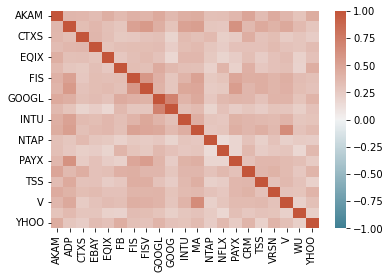

In [91]:
#it will be difficult to track correlation matrix, as we have 21 columns. We can make use of heatmap to analyse the correlation.
sns.heatmap(IT_stocks.corr(),vmin=-1,vmax=1,cmap = sns.diverging_palette(220, 20, as_cmap=True))

C:\Users\HP\AppData\Local\Temp\ipykernel_9904\2449214923.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = fig.colorbar(m)


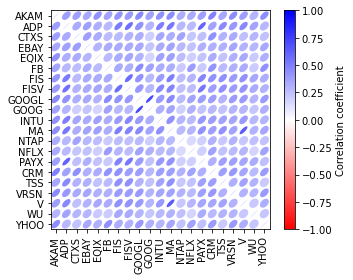

In [94]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    cb = fig.colorbar(m)
    cb.set_label('Correlation coefficient')
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(IT_stocks.corr(), figsize=(5, 4), cmap='bwr_r')


plt.tight_layout()
plt.show()

positive correlation - ellipse poiting towards top right corner <br>
negative correlation - ellipse pointing towards bottom right corner<br>
thinner and darker ellipse shows stronger relationship<br>

since pearson correlation is calculated using mean and standard deviation, it is sensitive to outliers. Other alternative, such as spearman correlation is robust to outliers since it is calculated using rank of the data.

### Multivariate analysis

In [3]:
kc_tax = pd.read_csv('.//Practical Statistics Code//data//kc_tax.csv')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [4]:
new_kctax = kc_tax[(kc_tax['TaxAssessedValue']<750000) & (kc_tax['SqFtTotLiving']>100) & (kc_tax['SqFtTotLiving'] <3500)]
new_kctax

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


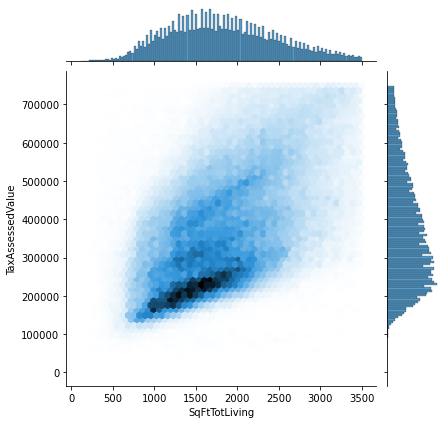

In [102]:
sns.jointplot(x = 'SqFtTotLiving', y ='TaxAssessedValue',data = new_kctax,kind = 'hex')

understanding and analysing scatter plot is difficult when there are thousand's of data points. In this case we can make use of hexagonal binning plot as shown above. The plot shows the relationship between square feet and the tax assessed values for homes. This plot groups records into hexagonal bins and plotted them with a color indicating number of records in that bin. The dark patch in the plot have the highest number of the records. The plot shows positive relationship between square feet and tax assessed values.

Text(0, 0.5, 'TaxAssessedValue')

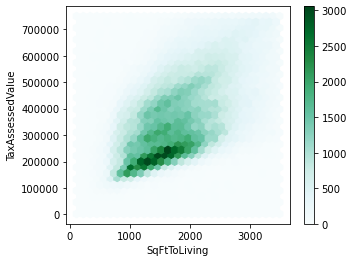

In [104]:
ax = new_kctax.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('SqFtToLiving')
ax.set_ylabel('TaxAssessedValue')


Text(0, 0.5, 'TaxAssessedValue')

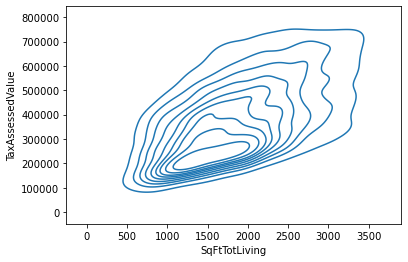

In [5]:
ax = sns.kdeplot(data = new_kctax.sample(10000),x='SqFtTotLiving', y='TaxAssessedValue')
ax.set_xlabel('SqFtTotLiving')
ax.set_ylabel('TaxAssessedValue')

### Sampling Distribution

In [3]:
loan_income = pd.read_csv('.\Practical Statistics Code\data\loans_income.csv',squeeze = True)
loan_income.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8088\1548074368.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  loan_income = pd.read_csv('.\Practical Statistics Code\data\loans_income.csv',squeeze = True)


0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [17]:
sample_data = pd.DataFrame({'income':loan_income.sample(1000),
                            'type':'Data'
                           })

sample_mean_5 = pd.DataFrame({'income': [loan_income.sample(5).mean() for _ in range(1000)],
                             'type': 'Mean of 5'
                             })

sample_mean_20 = pd.DataFrame({'income':[loan_income.sample(20).mean() for _ in range(1000)],
                              'type': 'Mean of 20'
                              })

results = pd.concat([sample_data,sample_mean_5,sample_mean_20])
results

,income,type
20076,95000.00,Data
34089,58000.00,Data
24967,40000.00,Data
4339,183000.00,Data
40288,50000.00,Data
...,...,...
995,68240.00,Mean of 20
996,62234.55,Mean of 20
997,58648.40,Mean of 20
998,69135.95,Mean of 20


In [18]:
results[results['type']=='Mean of 20']

,income,type
0,75339.05,Mean of 20
1,67922.25,Mean of 20
2,62429.10,Mean of 20
3,83865.20,Mean of 20
4,74487.80,Mean of 20
...,...,...
995,68240.00,Mean of 20
996,62234.55,Mean of 20
997,58648.40,Mean of 20
998,69135.95,Mean of 20


(array([ 1.,  3.,  2.,  3.,  8.,  8., 17., 25., 25., 33., 41., 41., 42.,
        43., 53., 61., 49., 66., 48., 49., 56., 49., 35., 48., 35., 26.,
        24., 20., 18., 16., 12.,  6.,  9.,  7.,  7.,  1.,  6.,  2.,  3.,
         2.]),
 array([50672.55   , 51697.53625, 52722.5225 , 53747.50875, 54772.495  ,
        55797.48125, 56822.4675 , 57847.45375, 58872.44   , 59897.42625,
        60922.4125 , 61947.39875, 62972.385  , 63997.37125, 65022.3575 ,
        66047.34375, 67072.33   , 68097.31625, 69122.3025 , 70147.28875,
        71172.275  , 72197.26125, 73222.2475 , 74247.23375, 75272.22   ,
        76297.20625, 77322.1925 , 78347.17875, 79372.165  , 80397.15125,
        81422.1375 , 82447.12375, 83472.11   , 84497.09625, 85522.0825 ,
        86547.06875, 87572.055  , 88597.04125, 89622.0275 , 90647.01375,
        91672.     ]),
 <BarContainer object of 40 artists>)

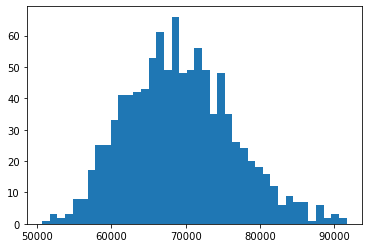

In [19]:
plt.hist(results[results['type'] == 'Mean of 20']['income'],bins = 40)

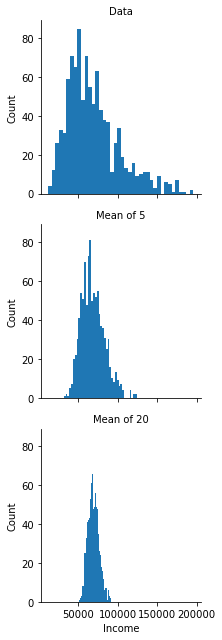

In [20]:
ax = sns.FacetGrid(results,col = 'type',col_wrap=1)
ax.map(plt.hist,'income',bins = 40)
ax.set_axis_labels('Income','Count')
ax.set_titles('{col_name}')

Text(0.5, 1.0, 'Mean of 50')

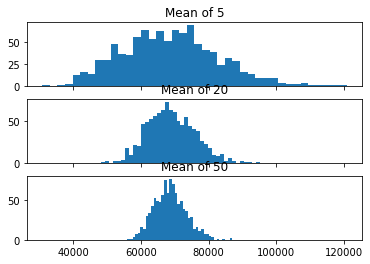

In [22]:
sample_mean_5 = pd.DataFrame({'income': [loan_income.sample(5).mean() for _ in range(1000)],
                             'type': 'Mean of 5'
                             })

sample_mean_20 = pd.DataFrame({'income':[loan_income.sample(20).mean() for _ in range(1000)],
                              'type': 'Mean of 20'
                              })

sample_mean_50 = pd.DataFrame({'income':[loan_income.sample(50).mean() for _ in range(1000)],
                              'type': 'Mean of 50'
                              })

results = pd.concat([sample_mean_5,sample_mean_20,sample_mean_50])

fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex = True)
ax0,ax1,ax2 = axes

ax0.hist(results[results['type']=='Mean of 5']['income'],bins = 40)
ax1.hist(results[results['type']=='Mean of 20']['income'],bins = 40)
ax2.hist(results[results['type']=='Mean of 50']['income'],bins = 40)
ax0.set_title('Mean of 5')
ax1.set_title('Mean of 20')
ax2.set_title('Mean of 50')

Larger the size of the sample, narrower is the distribution i.e. less standard deviation

### Bootstrapping

In [27]:
from sklearn.utils import resample
loan_income = pd.read_csv('.\Practical Statistics Code\data\loans_income.csv')
loan_income.shape

(50000, 1)

In [34]:
bootstrap_data = resample(loan_income)
bootstrap_data.shape

(50000, 1)

In [35]:
bootstrap_data.head()

,x
25019,150000
17375,59000
16170,64000
8702,61000
32704,100000


In [38]:
bootstrap_data.mean()

x    68876.15944
dtype: float64

In [39]:
bootstrap_data.mean().loc['x']

68876.15944

Text(0.5, 0, 'Loan Income')

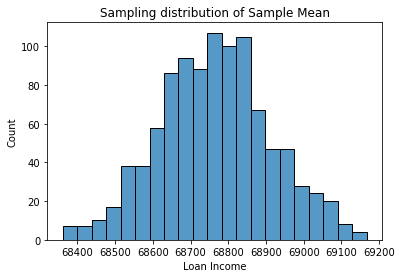

In [42]:
results = []
for _ in range(1000):
    bootstrap_data = resample(loan_income)
    results.append(bootstrap_data.mean().loc['x'])
#print(results)
results = pd.Series(results)
ax = sns.histplot(results)
ax.set_title('Sampling distribution of Sample Mean')
ax.set_xlabel('Loan Income')

population mean:x    68760.51844
dtype: float64, sampling dist mean: 68599.6043766
standard deviation of sampling dist:465.86409969067864, standard deviation of population: x    32872.03537
dtype: float64, Sampling dist mean according to central limit theorem:x    464.880782
dtype: float64


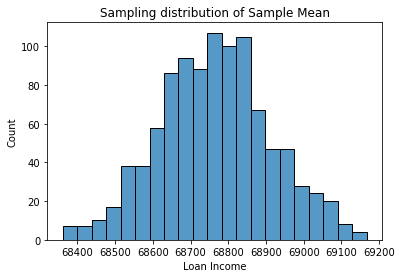

In [49]:
sample = loan_income.sample(5000)
bootstrap_means = []
for _ in range(1000):
    bootstrap_data = resample(sample)
    bootstrap_means.append(bootstrap_data.mean().loc['x'])
    
bootstrap_means = pd.Series(bootstrap_means)
ax = sns.histplot(results)
ax.set_title('Sampling distribution of Sample Mean')
ax.set_xlabel('Loan Income')
print(f"population mean:{loan_income.mean()}, sampling dist mean: {bootstrap_means.mean()}")
print(f'standard deviation of sampling dist:{bootstrap_means.std()}, standard deviation of population: {loan_income.std()}, Sampling dist mean according to central limit theorem:{loan_income.std()/np.sqrt(5000)}')

### Confidence Interval

In [50]:
loan_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [51]:
#given sample data
sample_20 = resample(loan_income,n_samples=20,replace=False)
sample_20.mean()

x    63297.85
dtype: float64

In [52]:
#bootstrapping
results = []
for _ in range(500):
    data = resample(sample_20)
    results.append(data.mean().loc['x'])
results = pd.Series(results)
results

0      51441.65
1      61970.45
2      61225.95
3      63570.45
4      59543.60
         ...   
495    73437.15
496    50373.10
497    57475.70
498    67199.30
499    74068.35
Length: 500, dtype: float64

In [54]:
confidence_interval_endpoints = results.quantile([0.05,0.95])
confidence_interval_endpoints

0.05    51197.7825
0.95    76231.2875
dtype: float64

Text(63714.535, 20, '90% interval')

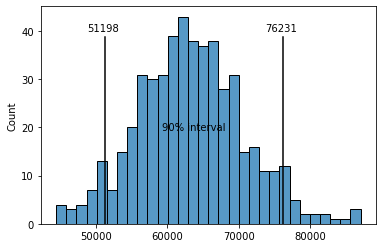

In [88]:
g = sns.histplot(results,bins = 30)
plt.axvline(confidence_interval_endpoints.loc[0.05],ymax = 0.86,color = 'black')
plt.axvline(confidence_interval_endpoints.loc[0.95],ymax = 0.86,color = 'black')
plt.text(confidence_interval_endpoints.loc[0.05]-2500,40,f'{confidence_interval_endpoints.loc[0.05]:.0f}')
plt.text(confidence_interval_endpoints.loc[0.95]-2500,40,f'{confidence_interval_endpoints.loc[0.95]:.0f}')
plt.text(sum(confidence_interval_endpoints) / 2, 20, '90% interval',horizontalalignment='center', verticalalignment='center',color = 'Black')

Text(0, 0.5, 'Counts')

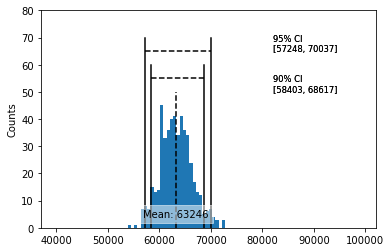

In [110]:
#creating a 90% and 95% confidence interval using bootstrapped data
sample100 = resample(loan_income,n_samples=100,replace=False)
sampling_mean = []

for _ in range(500):
    bootstrapped_data = resample(sample100)
    sampling_mean.append(bootstrapped_data.mean().loc['x'])

sampling_mean = pd.Series(sampling_mean)
confidence90 = list(sampling_mean.quantile([0.05,0.95]))
confidence95 = list(sampling_mean.quantile([0.025,0.975]))

fig, ax = plt.subplots()
#fig.Figure(figsize=(4,3))
fig.figsize = (4,3)
ax.hist(x = list(sampling_mean),bins = 30)
ax.plot(confidence90,[55,55],color = 'black',linestyle = '--')

for x in confidence90:
    ax.plot([x,x],[0,60],color = 'black')
    ax.text(82000, 50, f'90% CI\n[{confidence90[0]:.0f}, {confidence90[1]:.0f}]',fontsize='small')


ax.plot(confidence95,[65,65],color = 'black',linestyle = '--')
for x in confidence95:
    ax.plot([x,x],[0,70],color = 'black')
    ax.text(82000, 65, f'95% CI\n[{confidence95[0]:.0f}, {confidence95[1]:.0f}]',fontsize='small')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',bbox=dict(facecolor='white', edgecolor='white', alpha=0.5), horizontalalignment='center', verticalalignment='center')

ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)

ax.set_ylabel('Counts')

### Normal Distribution

QQ plot is used to determine how close a sample is to a particular distribution ex- normal dist, uniform dist etc. It can also used to determine if two samples have same distribution.

In [4]:
#generating data which follows normal distribution

sample = stats.norm.rvs(size = 1000)
sample


array([-9.61561078e-01, -2.59107936e-01,  8.85879147e-03,  3.78475623e-01,
        7.06733979e-01,  3.76403394e-01,  2.14709531e-01,  8.13297404e-01,
       -1.67523495e+00, -1.07053921e+00, -8.48910656e-01, -7.89008000e-01,
       -2.63997573e-01,  3.27576227e-01,  1.69315831e+00, -6.94023954e-01,
        6.59101424e-01,  1.65916911e+00, -1.32426177e+00, -3.88684755e-01,
       -1.13774922e+00, -9.94601828e-01, -1.98685317e+00,  5.88657638e-01,
       -1.80954665e+00,  3.52249405e-03, -1.53721931e+00, -8.41201200e-01,
       -6.34704649e-01,  1.19857613e+00,  1.09775423e+00, -5.89499053e-01,
        3.83154498e-01,  1.93648724e+00, -1.72738343e+00, -2.45146482e-01,
       -1.14510882e+00,  1.50748964e-01,  3.20631529e-02,  2.37581394e+00,
        2.30020412e+00,  9.62408071e-01,  1.94047065e+00, -3.44819909e-02,
        8.53185502e-01,  1.22182514e+00,  7.89022566e-01, -1.77704133e+00,
       -1.55176231e-01, -4.45522718e-01,  5.54498379e-01,  2.89505232e-01,
       -1.36451762e+00, -

rvs function returns random sample which follows a particular distribution (normal distribution in this case) and with probability equal to the distribution. So for standard normal distribution we are most likely to find sample between -1 and 1 as 68% data lies in this range. 

 - https://stackoverflow.com/questions/40333203/rvs-in-scipy-python <br>
 - https://discovery.cs.illinois.edu/learn/Polling-Confidence-Intervals-and-Hypothesis-Testing/Python-Functions-for-Random-Distributions/#:~:text=rvs()%20function%20returns%20a,sampled%2080%25%20of%20the%20time.

In [18]:
#to check distribution of our random sample (i.e. sample)

histo,bins = pd.cut(sample,bins = [-4,-3,-2,-1,0,1,2,3,4],retbins = True)
histo.value_counts()

(-4, -3]      2
(-3, -2]     23
(-2, -1]    149
(-1, 0]     329
(0, 1]      344
(1, 2]      127
(2, 3]       26
(3, 4]        0
dtype: int64

<AxesSubplot:ylabel='Count'>

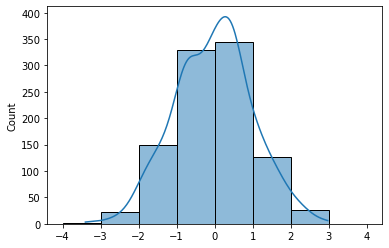

In [8]:
sns.histplot(data = sample,bins=bins,kde=True)

In [9]:
# to get probability distribution for our random sample

stats.norm.pdf(sample)

array([0.25126719, 0.38577268, 0.39892663, 0.37136851, 0.31077845,
       0.37165908, 0.3898518 , 0.28660083, 0.09806305, 0.22493009,
       0.27824224, 0.29223256, 0.38527963, 0.37810187, 0.09514711,
       0.3135573 , 0.32105402, 0.10072517, 0.16599906, 0.36991706,
       0.20884244, 0.24327691, 0.05542462, 0.33547849, 0.07760154,
       0.39893981, 0.12240009, 0.28006088, 0.3261612 , 0.19451794,
       0.21839046, 0.33531225, 0.3707074 , 0.06118031, 0.08973761,
       0.38713302, 0.20709542, 0.39443491, 0.39873727, 0.02372598,
       0.02831374, 0.25106255, 0.0607097 , 0.39870518, 0.2772318 ,
       0.18912126, 0.2922292 , 0.08225949, 0.39416788, 0.36125046,
       0.34209296, 0.38256941, 0.15725404, 0.3249112 , 0.18832218,
       0.2584202 , 0.0757826 , 0.08008478, 0.22311794, 0.3309477 ,
       0.36593592, 0.20666104, 0.15743224, 0.26163188, 0.3780218 ,
       0.14259768, 0.16494065, 0.15697894, 0.10028203, 0.32644023,
       0.05511895, 0.39830315, 0.39144586, 0.15638702, 0.39788

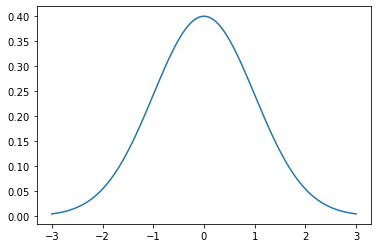

In [10]:
fig,ax = plt.subplots()
ax.plot(np.linspace(-3,3,300), stats.norm.pdf(np.linspace(-3,3,300)))

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

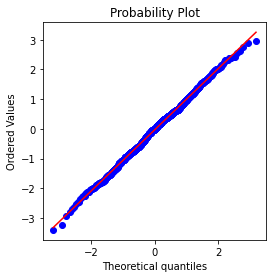

In [11]:
# to check whether our sample follows normal distribution-- use QQ plot

fig,ax = plt.subplots(figsize =(4,4))
stats.probplot(sample,plot=ax)


 QQ Plots-
 - https://www.statisticshowto.com/q-q-plots/
 - https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0
 - https://www.youtube.com/watch?v=okjYjClSjOg

In [32]:
skewed_right = stats.skewnorm.rvs(size = 2000,a = 2)
skewed_right

array([0.03575122, 1.62568879, 0.14252637, ..., 1.38303929, 2.65859492,
       1.33803346])

In [33]:
histo,bins = pd.cut(skewed_right,bins = [-4,-3,-2,-1,0,1,2,3,4],retbins = True)

In [34]:
histo.value_counts()

(-4, -3]       0
(-3, -2]       0
(-2, -1]       7
(-1, 0]      271
(0, 1]      1085
(1, 2]       529
(2, 3]       100
(3, 4]         7
dtype: int64

<AxesSubplot:ylabel='Count'>

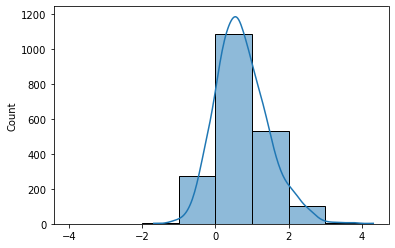

In [35]:
sns.histplot(skewed_right,bins=bins,kde=True)

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([-1.68196457, -1.26633871, -1.14088107, ...,  3.74307571,
          3.85403885,  4.3139964 ])),
 (0.7118345513058442, 0.7280259524244799, 0.9909789095331024))

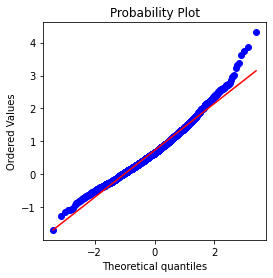

In [36]:
fig,ax = plt.subplots(figsize =(4,4))
stats.probplot(skewed_right,plot=ax)

when upper end of the QQ plot deviates from the straight line and lower end follows the straight line then the data is right skewed(i.e. positively skewed).

<AxesSubplot:ylabel='Count'>

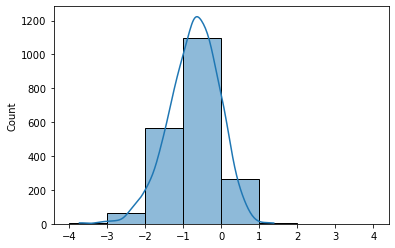

In [43]:
skewed_left = stats.skewnorm.rvs(size = 2000,a = -2)
histo,bins = pd.cut(skewed_left,bins = [-4,-3,-2,-1,0,1,2,3,4],retbins = True)
sns.histplot(skewed_left,bins=bins,kde=True)

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([-3.72286112, -3.64829388, -3.20267744, ...,  1.09970478,
          1.20706474,  1.38280359])),
 (0.6598577757622756, -0.7158211625151177, 0.9946839294163384))

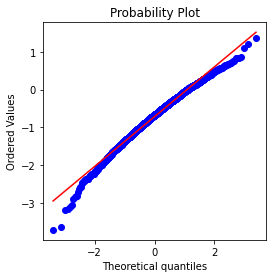

In [44]:
#QQ plot for left skewed data
fig,ax = plt.subplots(figsize =(4,4))
stats.probplot(skewed_left,plot=ax)

when lower end of the QQ plot deviates from the straight line and upper end follows the straight line then the data is left skewed(i.e. negatively skewed).

In [59]:
tailed_distribution = stats.gennorm.rvs(0.8,size = 1000)
histo,bins = pd.cut(tailed_distribution,bins = [-4,-3,-2,-1,-0,1,2,3,4],retbins = True)

In [60]:
histo.value_counts()

(-4, -3]     25
(-3, -2]     62
(-2, -1]    114
(-1, 0]     275
(0, 1]      264
(1, 2]      101
(2, 3]       57
(3, 4]       26
dtype: int64

<AxesSubplot:ylabel='Count'>

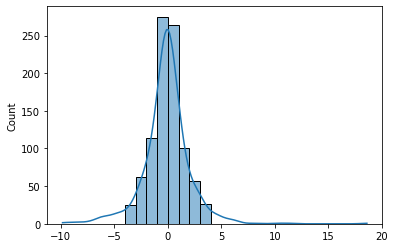

In [61]:
sns.histplot(tailed_distribution,bins = bins,kde=True)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

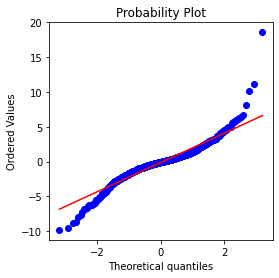

In [62]:
fig,ax = plt.subplots(figsize =(4,4))
stats.probplot(tailed_distribution,plot=ax)

distribution with fat tails(i.e. with high kurtosis) have both its ends deviating from the straight line. But its center follows the straight line.
Thin tailed distribution have near perfect QQ plot.

- Skewness <br>
skewness measures the symmetry of the distribution.
    1. Positive (Right skewed)
    2. Negative (Left skewed)
  
  
- Kurtosis <br>
Kurtosis measures the "tailedness" of the probability distribution. In simpler terms, it measures the extreme values in either tails.
    1. Higher kurtosis --> Longer tails
    2. Lower kurtosis --> tails less extreme as compared to tails of normal distribution
  
  
- Excess kurtosis <br>
used to compare kurtosis with that of the normal distribution. Kurtosis of normal distribution is 3.<br>
Excess Kurtosis = kurtosis - 3

https://en.wikipedia.org/wiki/Kurtosis
https://www.investopedia.com/terms/k/kurtosis.asp#:~:text=Kurtosis%20is%20a%20measure%20of,or%20minus)%20of%20the%20mean.
https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/   <br>
https://en.wikipedia.org/wiki/Moment_(mathematics)

In [64]:
normal_data = stats.norm.rvs(size=1000)
print(f'Excess Kurtosis of the normally distributed data: {stats.kurtosis(normal_data)}')
print(f'skewness of the normally distributed data: {stats.skew(normal_data)}')

Excess Kurtosis of the normally distributed data: -0.08743422458984584
skewness of the normally distributed data: 0.019309338940113396


As we increase the sample size, both the value of kurtosis and skewness will approach zero.

In [65]:
print(f'excess kurtosis for the tailed distribution: {stats.kurtosis(tailed_distribution)}')
print(f'skewness of the tailed distribution: {stats.skew(tailed_distribution)}')

excess kurtosis for the tailed distribution: 7.997833121751011
skewness of the tailed distribution: 0.3899785540160795


In [66]:
print(f'skewness of the negatively skewed distribution: {stats.skew(skewed_left)}')
print(f'skewness of the positively skewed distribution: {stats.skew(skewed_right)}')

skewness of the negatively skewed distribution: -0.4353475304668055
skewness of the positively skewed distribution: 0.5716967859296735


skewness values greater than zero means more weight in the right tail of the distribution. <br>
less than zero --> more weight in the left tail

In [67]:
# for normal distribution
mean , variance, skewness, kurtosis = stats.norm.stats(moments = 'mvsk')
print(f'mean: {mean}')
print(f'variance: {variance}')
print(f'skewness: {skewness}')
print(f'kurtosis: {kurtosis}')

mean: 0.0
variance: 1.0
skewness: 0.0
kurtosis: 0.0


### Binomial Distribution

In [68]:
#success = head in a toss
#probability of success = 0.4
# random variable - no of heads in 5 trails
binomial_dist = stats.binom.pmf([0,1,2,3,4,5],n=5,p=0.4)
binomial_dist

array([0.07776, 0.2592 , 0.3456 , 0.2304 , 0.0768 , 0.01024])

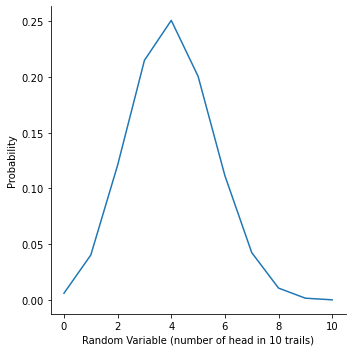

In [91]:
random_variable = [x for x in range(11)]
binomial_dist = stats.binom.pmf(random_variable,n=10,p=0.4)
ax = sns.relplot(x = random_variable,y = binomial_dist,kind='line')
ax.set_xlabels('Random Variable (number of head in 10 trails)')
ax.set_ylabels('Probability')
ax.set_titles('Probability distribution')

Text(0.5, 1.0, 'Probability distribution')

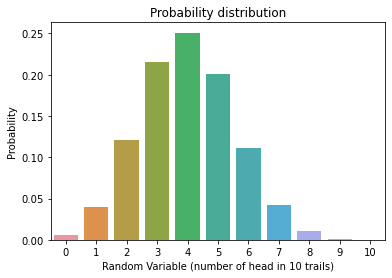

In [85]:
ax = sns.barplot(x = random_variable,y = binomial_dist)
ax.set_xlabel('Random Variable (number of head in 10 trails)')
ax.set_ylabel('Probability')
ax.set_title('Probability distribution')

In [79]:
stats.binom.cdf(6,n=10,p=0.4)

0.9452381183999999

In [80]:
stats.binom.cdf(8,n=10,p=0.4)

0.9983222784

## Hypothesis Testing

#### Permutation Test (Randomization test)

Permutation test (non parametric) is a type of resampling which is used to test hypothesis.<br>
Suppose we have a random variable $X_{A}$ from sample A and random variable $X_{B}$ from sample B. The sample means of groups are $\overline x_{A}$ and $\overline x_{B}$. How can we decide whether $X_{A}$ and $X_{B}$ comes from the same distribution?

We will use the permutation test to verify the null hypothesis ($H_{0}$) that the data drawn from A is from the same distribution as data drawn from B. We will check whether difference between sample means is large enough to reject the null hypothesis.

https://en.wikipedia.org/wiki/Permutation_test  <br>
https://towardsdatascience.com/how-to-use-permutation-tests-bacc79f45749

In [100]:
session_times = pd.read_csv('./Practical Statistics Code/data/web_page_data.csv')
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


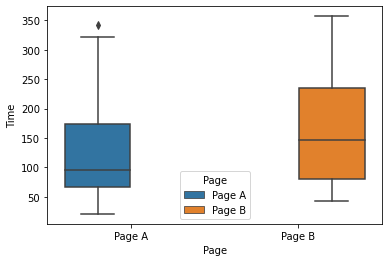

In [101]:
session_times['Time'] = session_times['Time']*100
g = sns.boxplot(x = 'Page',y ='Time' ,data = session_times,hue = session_times['Page'])

In [102]:
#sample mean difference-
mean_pagea = session_times[session_times['Page']=='Page A']['Time'].mean()
mean_pageb = session_times[session_times['Page']=='Page B']['Time'].mean()
mean_pagea - mean_pageb

-35.66666666666667

avg session time of Page B is greater than Page A by 35.67 seconds. To check whether this difference is significant and whether presentation of page B is better than page A, we conduct a hypothesis test.

$H_{0}$: $\mu_{A}$ = $\mu_{B}$ (i.e. both the samples A and B are from the same distribution)<br>
$H_{1}$: $\mu_{A}$ $\neq$ $\mu_{B}$

In [103]:
import random

In [141]:
#using permutation test to verify this hypothesis
def perm(data,nA,nB):
    total = nA + nB
    indexesB = set(random.sample(range(total),nB))
    indexesA = set(range(total)) - indexesB
    return data.loc[list(indexesB)]['Time'].mean() - data.loc[list(indexesA)]['Time'].mean()

In [142]:
nA = session_times[session_times['Page'] == 'Page A'].count()
nB = session_times[session_times['Page'] == 'Page B'].count()
perm(session_times,nA['Page'],nB['Page'])

-14.50476190476192

Text(0, 0.5, 'Frequency')

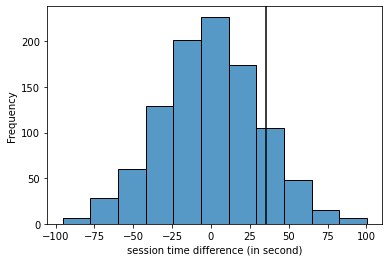

In [143]:
random.seed(1)
perm_diffs = [perm(session_times,nA['Page'],nB['Page']) for _ in range(1000)]
fig, ax = plt.subplots()
sns.histplot(perm_diffs,bins=11,ax=ax)
ax.axvline(x = mean_pageb - mean_pagea,color = 'black')
ax.set_xlabel('session time difference (in second)')
ax.set_ylabel('Frequency')

In [144]:
# p-value of the hypothesis is estimated as the proportion of permutations that give a difference as large or larger 
#than the difference of means of the original samples.
p_value = np.sum(perm_diffs > mean_pageb - mean_pagea)/len(perm_diffs)
p_value

0.121

In [151]:
type(mean_pageb)

numpy.float64

Assuming significance level of 0.05 (5%).

P value is greater than the significance level, hence we fail to reject the null hypothesis.

### Permutation test for proportion

observed proportion difference: 0.0368%


Text(0, 0.5, 'Frequency')

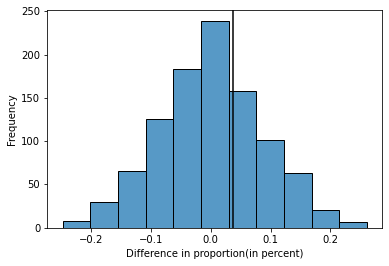

In [156]:
#Permutation test for difference in proportion
random.seed(1)
def perm(data,nA,nB):
    total = nA + nB
    indexesB = set(random.sample(range(total),nB))
    indexesA = set(range(total)) - indexesB
    dataB = data.loc[list(indexesB)]
    dataA = data.loc[list(indexesA)]
    count1_A = dataA[dataA == 1]
    count1_B = dataB[dataB == 1]
    return (count1_A.shape[0]/dataA.shape[0]) - (count1_B.shape[0]/dataB.shape[0]) 

observed_proportion_diff = 100 * ((200/(23539+200)) - (182/(22406+182)))
print(f'observed proportion difference: {observed_proportion_diff:.4f}%')

pooled_data = [0]*45945
pooled_data.extend([1]*382)
pooled_data = pd.Series(pooled_data)

perm_diffs = [100 * perm(pooled_data, 23739, 22588) for _ in range(1000)]

fig, ax = plt.subplots()
sns.histplot(perm_diffs,bins=11,ax=ax)
ax.axvline(x = observed_proportion_diff,color = 'black')
ax.set_xlabel('Difference in proportion(in percent)')
ax.set_ylabel('Frequency')

In [157]:
p_value = np.sum(np.array(perm_diffs) > observed_proportion_diff)/len(perm_diffs)
p_value

0.318

Assuming significance level of 0.05. P value is greater than alpha. Therefore, we fail to reject null hypothesis.

### Chi Square test for homogeneity

As we are testing null hypothesis related to difference in proportion. We can also make use of Chi Sqaure test for homogeneity

https://www.coursehero.com/study-guides/wmopen-concepts-statistics/test-of-homogeneity/  <br>
http://inspire.stat.ucla.edu/unit_13/

In [161]:
data = np.array([[200, 23739-200],[182, 22588-182]])
chi2, p_value, dof, expected = stats.chi2_contingency(data)
print("Observed:")
print(data)
print("Expected")
print(expected)

Observed:
[[  200 23539]
 [  182 22406]]
Expected
[[  195.74541844 23543.25458156]
 [  186.25458156 22401.74541844]]


In [173]:
print(f"Chi square statistic: {chi2}")
print(f"Degree of freedom value: {dof}")
print(f"P value for one tail: {p_value}")

Chi square statistic: 0.14893055235461503
Degree of freedom value: 1
P value for one tail: 0.6995594627146615


In [165]:
stats.chi2.ppf(1-0.05,1)

3.841458820694124

### Comparing population proportion using Z test

In [166]:
from statsmodels.stats.proportion import proportions_ztest

In [174]:
success = np.array([200,182])
trials = np.array([23739,22588])
zstat, pvalue = proportions_ztest(success,trials)
print(f"z statistic: {zstat}")
print(f"p value for two tailed test: {pvalue}")

z statistic: 0.437307786942451
p value for two tailed test: 0.6618881488312065


### T test - two sample T test for difference of mean

In [175]:
session_times = pd.read_csv('./Practical Statistics Code/data/web_page_data.csv')
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [177]:
#assuming significance level of 0.05 i.e. 5%.
t_stat, pvalue =  stats.ttest_ind(session_times[session_times['Page'] == "Page A"]['Time'],
                session_times[session_times['Page'] == "Page B"]['Time'],equal_var = False)
print(f't statistic: {t_stat}')
print(f'p value for two tailed test: {pvalue}')

t statistic: -1.0983155623638117
p value for two tailed test: 0.281524372457006


p value is greater than significance level. Hence, we do not have sufficient evidence to accept the alternate hypothesis. Therefore, we fail to reject the null hypothesis i.e. both the web pages (Page A and Page B) have equal average session time.

In [178]:
#using t test from statsmodel library
import statsmodels.api as sm

In [179]:
tstat, p_value, dof = sm.stats.ttest_ind(session_times[session_times['Page'] == "Page A"]['Time'],
                session_times[session_times['Page'] == "Page B"]['Time'],usevar = 'unequal')
print(f't statistic: {t_stat}')
print(f'p value for two tailed test: {pvalue}')
print(f'Degree of freedom: {dof}')

t statistic: -1.0983155623638117
p value for two tailed test: 0.281524372457006
Degree of freedom: 27.69337005953131


### ANOVA

 - ANOVA is a statistical procedure for analyzing the results of an experiment with multiple groups.
 - It is the extension of similar procedures for the A/B test, used to assess whether the overall variation among groups is within the range of chance variation

In [182]:
four_sessions = pd.read_csv('./Practical Statistics Code/data/four_sessions.csv')
four_sessions.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


Text(0, 0.5, 'Session Time (in seconds)')

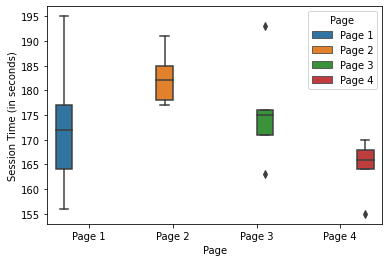

In [184]:
ax = sns.boxplot(x='Page',y='Time',data = four_sessions,hue = 'Page')
ax.set_ylabel('Session Time (in seconds)')

In [191]:
observed_variance = four_sessions.groupby('Page').mean().var()['Time']
group_mean = four_sessions.groupby('Page').mean()
print(f'means of each group: {group_mean.values.ravel()}')
print(f'Observed variance: {observed_variance}')

means of each group: [172.8 182.6 175.6 164.6]
Observed variance: 55.426666666666655


In [192]:
## RESAMPLING APPROACH

def perm_test(data):
    copydata = data.copy()
    copydata['Time'] = np.random.permutation(copydata['Time'].values)
    return copydata.groupby('Page').mean().var()['Time']
perm_test(four_sessions)

42.92000000000002

Text(0.5, 0, 'Difference in variance')

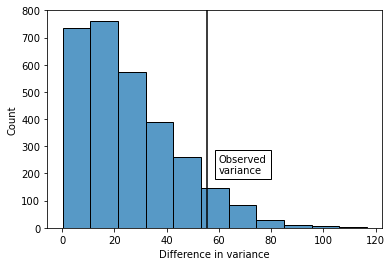

In [194]:
random.seed(1)
perm_var = [perm_test(four_sessions) for _ in range(3000)]
ax = sns.histplot(perm_var,bins = 11)
ax.axvline(observed_variance,color='black')
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Difference in variance')

In [195]:
# p value - proportion of the time did the resampled variance exceed the observed variance
p_value = np.mean([var > observed_variance for var in perm_var])
print(f'P value: {p_value}')

P value: 0.07966666666666666


P value is greater than the significance level of 0.05. Hence we fail to reject the null hypothesis

### F statistic for ANOVA

In [198]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [199]:
model = smf.ols('Time ~ Page',data= four_sessions).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


In [202]:
#using scipy library
fstat,pvalue = stats.f_oneway(four_sessions[four_sessions['Page']=='Page 1']['Time'],
              four_sessions[four_sessions['Page']=='Page 2']['Time'],
              four_sessions[four_sessions['Page']=='Page 3']['Time'],
              four_sessions[four_sessions['Page']=='Page 4']['Time'])

print(f'F statistic: {fstat}')
print(f'P value: {pvalue}')

F statistic: 2.739825341901467
P value: 0.0775862152580146


F critical value for DF1 = 3, DF2 = 16 and for significance value of 0.05 is 3.239. F statistic value is less than the critical value. Also, P value is less than significance level of 0.05.

### Two-way anova only available with statsmodels
```
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
```

Once we know that the difference is statistically significant, we have to do post hoc analysis to understand which two groups have different means. We can use benferroni approach or t-test to identify two groups whose means are different.

### Chi Square Test - Resampling approach

In [210]:
click_rates = pd.read_csv("./Practical Statistics Code/data/click_rates.csv")
click_rates

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988


In [211]:
click_rates = click_rates.pivot(index = 'Click', columns= 'Headline',values='Rate')
click_rates

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [212]:
expected = click_rates.mean(axis=1)
expected

Click
Click        11.333333
No-click    988.666667
dtype: float64

In [213]:
click_rates.values

array([[ 14,   8,  12],
       [986, 992, 988]], dtype=int64)

In [216]:
box = [1]*34
box.extend([0]*2966)
random.shuffle(box)

def chi2(observed,expected):
    pearson_residuals = []
    for obsv,exp in zip(observed,expected):
        pearson_residuals.append([(obs-exp)**2/exp for obs in obsv])
    return np.sum(pearson_residuals)

expected_clicks = 34/3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(click_rates.values, expected)

def perm_test(box):
    sample_clicks = [sum(random.sample(box,1000)),
                    sum(random.sample(box,1000)),
                    sum(random.sample(box,1000))]
    sample_noclicks = [1000-n for n in sample_clicks]
    return chi2([sample_clicks,sample_noclicks],expected)
    
chi2_perm = [perm_test(box) for _ in range(2000)]

pvalue = sum(chi2_perm > chi2observed)/len(chi2_perm)
print(f'observed chi2 statistic: {chi2observed}')
print(f'p value: {pvalue}')

observed chi2 statistic: 1.6659394708658917
p value: 0.5


In [217]:
# using chi2_contingency function from scipy library

chistat, pvalue,df,expected = stats.chi2_contingency(click_rates)
print('Observed:')
print(click_rates)
print('Expected:')
print(expected)
print(f'chi square statistic: {chistat}')
print(f'p value: {pvalue}')
print(f'degree of freedom: {df}')

Observed:
Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988
Expected:
[[ 11.33333333  11.33333333  11.33333333]
 [988.66666667 988.66666667 988.66666667]]
chi square statistic: 1.6659394708658917
p value: 0.4347562562343731
degree of freedom: 2
